In [128]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import torch
import numpy as np
def plot_y(y_pred, y_true):
    y_pred = y_pred.reshape(-1)
    y_true = y_true.reshape(-1)
    order = np.argsort(y_pred)
    plt.plot(y_true[order], 'o ', ms=10, label=u'réel')
    plt.plot(y_pred[order], 'P ', ms=5, label=u'prédiction')
    plt.legend()
    plt.xlabel(u'échantillons')
    plt.ylabel('valeur de y')

## torch.nn 
- `torch.nn` contains many useful utilities for neural netwoks and ML models in general
- many commonly used layers and loss functions are already available

In [129]:
print('Avaliable modules/layers/losses in torch.nn')
print([n for n in dir(torch.nn) if not n.startswith('_')] )

Avaliable modules/layers/losses in torch.nn
['AdaptiveAvgPool1d', 'AdaptiveAvgPool2d', 'AdaptiveAvgPool3d', 'AdaptiveLogSoftmaxWithLoss', 'AdaptiveMaxPool1d', 'AdaptiveMaxPool2d', 'AdaptiveMaxPool3d', 'AlphaDropout', 'AvgPool1d', 'AvgPool2d', 'AvgPool3d', 'BCELoss', 'BCEWithLogitsLoss', 'BatchNorm1d', 'BatchNorm2d', 'BatchNorm3d', 'Bilinear', 'ConstantPad1d', 'ConstantPad2d', 'ConstantPad3d', 'Container', 'Conv1d', 'Conv2d', 'Conv3d', 'ConvTranspose1d', 'ConvTranspose2d', 'ConvTranspose3d', 'CosineEmbeddingLoss', 'CosineSimilarity', 'CrossEntropyLoss', 'CrossMapLRN2d', 'DataParallel', 'Dropout', 'Dropout2d', 'Dropout3d', 'ELU', 'Embedding', 'EmbeddingBag', 'FeatureAlphaDropout', 'Fold', 'FractionalMaxPool2d', 'GLU', 'GRU', 'GRUCell', 'GroupNorm', 'Hardshrink', 'Hardtanh', 'HingeEmbeddingLoss', 'InstanceNorm1d', 'InstanceNorm2d', 'InstanceNorm3d', 'KLDivLoss', 'L1Loss', 'LPPool1d', 'LPPool2d', 'LSTM', 'LSTMCell', 'LayerNorm', 'LeakyReLU', 'Linear', 'LocalResponseNorm', 'LogSigmoid', 'Lo

### nn.Module
- `nn.Module`: the basic unit. One must
  - declare params in the class constructor `__init__`
  - implement `forward` method returning the module's computation

In [130]:
from torch import nn

class MyModule(nn.Module):
    def __init__(self, args, **kwargs):
        # always call __init__ from parent Module
        super().__init__(args, **kwargs)  
        self.param1 
        self.param2
        
    def forward(self, X):
        # do some computation on X, for instance
        result = X.mean(1)
        return result
        

## torch.optim
Implements many commonly used gradient-based optimization algorithms

In [131]:
[n for n in dir(torch.optim) if not n.startswith('_')]

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 'lr_scheduler']

## Example using nn and optim: Simple neural network

### Data

In [132]:
from sklearn.datasets import load_wine 
data = load_wine() 
print(data.DESCR) 
X, y = data.data.astype(np.float32), data.target.astype(np.int64)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#y_train, y_test = y_train.reshape([-1,1]), y_test.reshape([-1,1])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

n_classes = int(y.max()+1)

import pandas as pd
pd.DataFrame(X[:20,:], columns=data.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.600000,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.200000,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.600000,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.799999,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.000000,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.200000,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.600000,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.600000,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.000000,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.000000,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


### Model
Let's create a module implementing a network with one hidden layer (aka MLP):
$$ y = W_o\sigma (XW_h + b )$$

We are going to use `nn.Linear` to compute linear transformations


In [134]:
  class MLP(nn.Module):
    def __init__(self, in_features, n_hidden, n_out):
        # always call __init__ from parent Module
        super().__init__()
        
        # declare layers 
        # hidden layer contains Wh and b parameters
        self.hidden1 = nn.Linear(in_features, n_hidden, bias=True)
        nn.init.xavier_normal_(self.hidden1.weight)
        nn.init.zeros_(self.hidden1.bias)
        # output layer contains Wo
        self.output = nn.Linear(n_hidden, n_out, bias=False)
        nn.init.xavier_normal_(self.output.weight)

        
    def forward(self, X):
        # calling the layer automatically calls its forward method
        H1 = torch.tanh(self.hidden1(X))
        return self.output(H1)

Now we create a network instancing the MLP module 

In [135]:
torch.manual_seed(2)
my_net = MLP(in_features=X.shape[1], n_hidden=5, n_out=n_classes)
my_net

MLP(
  (hidden1): Linear(in_features=13, out_features=5, bias=True)
  (output): Linear(in_features=5, out_features=3, bias=False)
)

We can see the networks parameters using the `parameters` or `named_parameters` methods.

In [136]:
print(list(my_net.named_parameters()))

[('hidden1.weight', Parameter containing:
tensor([[-0.0785,  0.3148,  0.1820, -0.4525,  0.3818, -0.3215, -0.0862, -0.0140,
          0.0628,  0.7144, -0.0926,  0.1837,  0.0051],
        [-0.3061, -0.4114,  0.0846,  0.1113,  0.0586,  0.1621,  0.0923,  0.1997,
         -0.1007, -0.2482, -0.3638, -0.3489, -0.5257],
        [ 0.1423,  0.2263,  0.3061,  0.1602,  0.5516,  0.2017,  0.0589,  0.3408,
         -0.0998, -0.4819,  0.2302, -0.5647, -0.0338],
        [ 0.4110, -0.0136,  0.3998,  0.5747,  0.0805,  0.5704,  0.3799,  0.0169,
         -0.1466, -0.1632, -0.0689, -0.5080,  0.0771],
        [ 0.9442,  0.2124,  0.0736,  0.1167, -0.4876, -0.5531,  0.0171, -0.1028,
          0.2667, -0.3046, -0.0017,  0.3305, -0.3894]], requires_grad=True)), ('hidden1.bias', Parameter containing:
tensor([0., 0., 0., 0., 0.], requires_grad=True)), ('output.weight', Parameter containing:
tensor([[-0.0358, -0.0480, -0.0950, -0.6569, -0.4969],
        [ 0.3481,  0.6202, -0.1358, -0.2993, -0.2224],
        [-0.561

### Training


Now we use an optimizer to adjust our network weights

In [137]:
# create optimizer informing parameters and learning rate
optimizer = torch.optim.Adam(my_net.parameters(), lr=1e-3)

And a loss function

In [138]:
loss_fn = nn.CrossEntropyLoss()

In [139]:
n_iterations = 500
loss_curve = []
val_curve = []
for _ in range(n_iterations):
    # to compute a forward pass we simply call module instance 
    # the forward method is automatically called
    logits = my_net(torch.from_numpy(X_train))
    y_pred = torch.argmax(logits, 1)
    
    # call loss function over predictions and true labels
    loss = loss_fn(logits, torch.from_numpy(y_train.reshape(-1)))
    loss_curve.append(loss.cpu().detach().numpy())
    
    # backpropagate gradients
    loss.backward()
    
    # perform gradient step
    optimizer.step()
    
    # always zero gradients btw backward calls
    optimizer.zero_grad()

    # validation curve
    logits_val = my_net(torch.from_numpy(X_test))
    y_pred_val = torch.argmax(logits_val, 1)
    val_loss = loss_fn(logits_val, torch.from_numpy(y_test))
    val_curve.append(val_loss.detach().numpy())

train loss 0.3204758
val loss 0.32694188


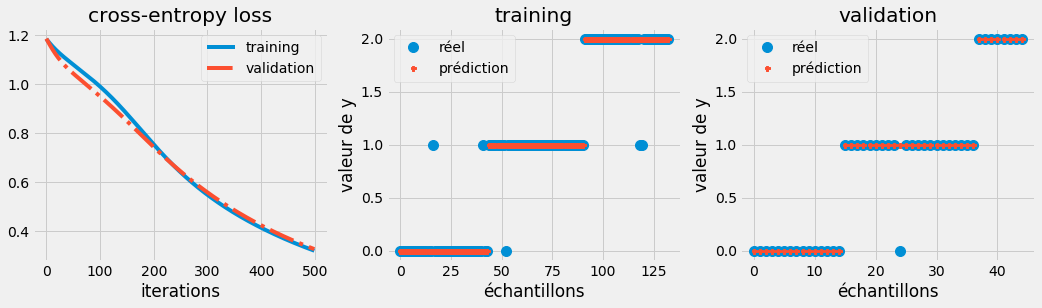

In [140]:
plt.subplot(1,3,1)

plt.plot(loss_curve, label='training')
plt.plot(val_curve, "-.",label='validation')
plt.legend()
plt.title('cross-entropy loss'); plt.xlabel('iterations')
plt.subplot(1,3,2)
plt.title('training')
plot_y( y_pred.detach().numpy(), y_train)
plt.subplot(1,3,3)
plt.title('validation')
plot_y(y_pred_val.detach().numpy(),y_test)
plt.gcf().set_size_inches(16,4)
print( "train loss", loss.detach().numpy())
print( "val loss", val_loss.detach().numpy())

 
# To learn more
Many possibilities at https://pytorch.org/tutorials/
- [Learning PyTorch with Examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)
- [Deep Learning with PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
- [Data Loading and Processing Tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)
- [Chatbot Tutorial](https://pytorch.org/tutorials/beginner/chatbot_tutorial.html)
- [Reinforcement Learning (DQN) Tutorial](https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html)

Also check the [migration guide to 0.4.0](https://pytorch.org/blog/pytorch-0_4_0-migration-guide/)

If you like scikit-learn, checkout [skorch=pytorch+sklearn](https://github.com/dnouri/skorch)